In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
ss_enabled_data_path = '../latency_samples/2023-06-30T073412Z/snapstart_enabled.csv'
ss_disabled_data_path = '../latency_samples/2023-06-30T073412Z/snapstart_disabled.csv'

In [3]:
ss_enabled_df = pd.read_csv(ss_enabled_data_path, names=['snapstart_enabled'])
ss_disabled_df = pd.read_csv(ss_disabled_data_path, names=['snapstart_disabled'])

In [4]:
p_enabled = ss_enabled_df.quantile([0.5, 0.95], numeric_only=True)
p_disabled = ss_disabled_df.quantile([0.5, 0.95], numeric_only=True)
median_enabled = ss_enabled_df.median().to_string(index = False, header=False)
median_disabled = ss_disabled_df.median().to_string(index = False, header=False)

print("SnapStart Disabled stats:\n")
print(f"Median: {median_disabled}\n")
print("Percentile:\n")
print(f"{p_disabled}\n")

print("SnapStart Enabled stats:\n")
print(f"Median: {median_enabled}\n")
print("Percentile:\n")
print(f"{p_enabled}\n")

SnapStart Disabled stats:

Median:  921.0

Percentile:

      snapstart_disabled
0.50              921.00
0.95             1076.35

SnapStart Enabled stats:

Median:  836.5

Percentile:

      snapstart_enabled
0.50             836.50
0.95            1054.25



In [5]:
plot_df = pd.concat([ss_enabled_df, ss_disabled_df])

<AxesSubplot:ylabel='Proportion'>

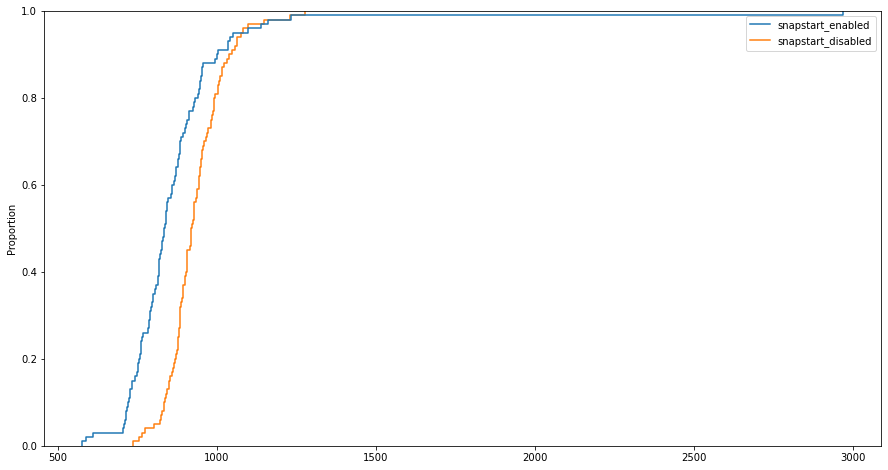

In [6]:
plt.figure(figsize=(15,8))
sb.ecdfplot(data=plot_df, stat="proportion")